In [1]:
import pandas as pd
import numpy as np

In [2]:
#A cleaned version Brazil MST data (only for 2005)
data = pd.read_stata('C:/Users/user/Desktop/Advanced Data Analysis with Python/Datasets/Brazil MST data 2005.dta')
data.columns

Index(['ibgecode', 'state', 'latitude', 'longitude', 'invasions_count',
       'reforms_count', 'invasions_count_cum', 'invasions_dum', 'log_income',
       'ln_agriculturalproductivity', 'codigo', 'PT_voteshare',
       'infantmortality', 'BF_coverage1000', 'log_invasions_count_cum',
       'log_intended_lands1995'],
      dtype='object')

In [3]:
data

,ibgecode,state,latitude,longitude,invasions_count,reforms_count,invasions_count_cum,invasions_dum,log_income,ln_agriculturalproductivity,codigo,PT_voteshare,infantmortality,BF_coverage1000,log_invasions_count_cum,log_intended_lands1995
0,1100015,RO,-11.944,-61.907,0.0,0.0,1.0,0.0,5.704232,4.058813,110001,0.143244,23.508137,70.383179,0.693147,12.880941
1,1100023,RO,-9.913,-63.041,4.0,0.0,9.0,1.0,6.048920,4.563440,110002,0.084352,13.881177,46.206680,2.302585,12.876694
2,1100031,RO,-13.498,-60.554,0.0,0.0,0.0,0.0,5.670812,4.332453,110003,0.238043,0.000000,13.717052,0.000000,12.372421
3,1100049,RO,-11.438,-61.448,0.0,0.0,1.0,0.0,6.012553,4.106792,110004,0.175060,16.358463,78.762436,0.693147,12.665471
4,1100056,RO,-13.189,-60.812,0.0,0.0,1.0,0.0,5.941381,4.385105,110005,0.295203,19.801981,72.037315,0.693147,13.052385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,5222005,GO,-16.742,-48.516,0.0,0.0,0.0,0.0,6.217075,4.480215,522200,0.116532,36.269428,3.071108,0.000000,11.895869
5594,5222054,GO,-17.735,-49.806,0.0,0.0,0.0,0.0,6.141865,NaN,522205,0.015775,18.181818,37.521141,0.000000,11.844603
5595,5222203,GO,-15.038,-47.059,0.0,0.0,1.0,0.0,5.546036,4.487371,522220,0.020011,0.000000,71.208298,0.693147,12.212556
5596,5222302,GO,-15.457,-48.889,0.0,0.0,5.0,0.0,5.495630,4.494347,522230,0.019916,18.518518,22.953484,1.791759,NaN


<AxesSubplot:xlabel='invasions_count_cum', ylabel='BF_coverage1000'>

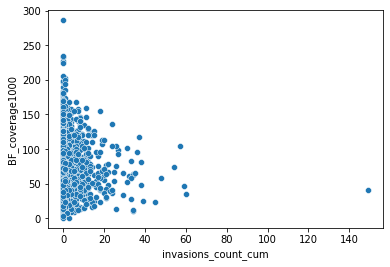

In [4]:
import seaborn as sns
sns.scatterplot(x="invasions_count_cum", y="BF_coverage1000", data=data)

<AxesSubplot:xlabel='invasions_count', ylabel='BF_coverage1000'>

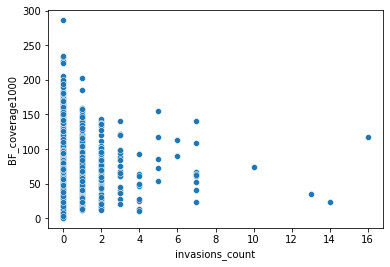

In [5]:
sns.scatterplot(x="invasions_count", y="BF_coverage1000", data=data)

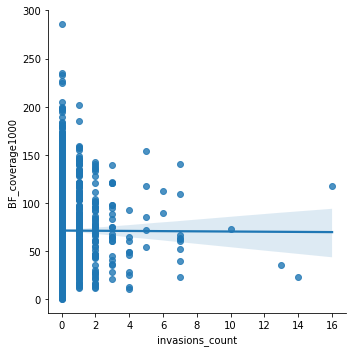

In [6]:
sns.lmplot(x="invasions_count", y="BF_coverage1000", data=data)

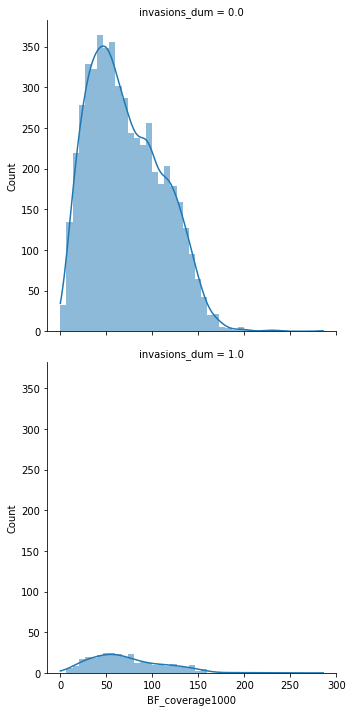

In [7]:
sns.displot(x='BF_coverage1000', row='invasions_dum', data=data, linewidth=0, kde=True)

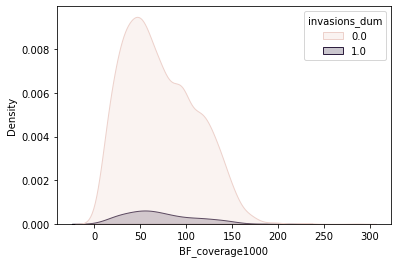

In [8]:
sns.kdeplot(x='BF_coverage1000', hue='invasions_dum', data=data, shade=True);

In [9]:
#Frequency
data.groupby('invasions_count')['invasions_count'].count()

invasions_count
0.0     5252
1.0      199
2.0       63
3.0       24
4.0       10
5.0        5
6.0        2
7.0        9
10.0       1
13.0       1
14.0       1
16.0       1
Name: invasions_count, dtype: int64

### IV2SLS model

In [10]:
#pip install statsmodels
#pip install linearmodels

In [11]:
data = data.dropna(axis=0)

In [12]:
from statsmodels.sandbox.regression.gmm import IV2SLS

In [13]:
iv2sls = IV2SLS(data['BF_coverage1000'], data['log_invasions_count_cum'], data['log_intended_lands1995']).fit()

In [18]:
iv2sls.params

log_invasions_count_cum    185.346405
dtype: float32

In [24]:
import linearmodels

In [25]:
from linearmodels.iv import IV2SLS

In [26]:
formula = 'BF_coverage1000 ~ 1 + log_income + ln_agriculturalproductivity + PT_voteshare + infantmortality + [log_invasions_count_cum ~ log_intended_lands1995]'
iv2sls = IV2SLS.from_formula(formula, data).fit()

In [28]:
def parse(model, exog="log_invasions_count_cum"):
    param = model.params[exog]
    se = model.std_errors[exog]
    p_val = model.pvalues[exog]
    print(f"Parameter: {param}")
    print(f"SE: {se}")
    print(f"95 CI: {(-1.96*se,1.96*se) + param}")
    print(f"P-value: {p_val}")
    
parse(iv2sls)

Parameter: -7.044644076209849
SE: 1.7781975623053377
95 CI: [-10.5299113   -3.55937685]
P-value: 7.442523281420144e-05


In [29]:
iv2sls

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:        BF_coverage1000   R-squared:                      0.5526
Estimator:                    IV-2SLS   Adj. R-squared:                 0.5521
No. Observations:                4917   F-statistic:                    5649.1
Date:                Fri, Aug 05 2022   P-value (F-stat)                0.0000
Time:                        13:01:53   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                                      Parameter Estimates                                      
===============================================================================================
                             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------
Intercept                       409.06     5.4618     74.896     0.0000      398.36      419.77
PT_voteshare                   -14.384     4.1160    -3.4946     0.0005     -22.451     -6.3165
infantmortality                -0.0094     0.0280    -0.3344     0.7381     -0.0642      0.0455
ln_agriculturalproductivity    -6.1430     0.4897    -12.545     0.0000     -7.1028     -5.1833
log_income                     -54.553     1.0467    -52.120     0.0000     -56.604     -52.501
log_invasions_count_cum        -7.0446     1.7782    -3.9617     0.0001     -10.530     -3.5594
===============================================================================================

Endogenous: log_invasions_count_cum
Instruments: log_intended_lands1995
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x1ed27d732e0